In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [3]:
df.shape

(404290, 6)

In [4]:
df_new = df.sample(40000, random_state=42)

In [5]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                   How do I play Pokémon GO in Korea?   
368101  What are some of the best side dishes for crab...   
70497   Which is more advisable and better material fo...   
226567       How do I improve logical programming skills?   
73186              How close we are to see 3rd world war?   

                                                question2  is_duplicate  
8067                   How do I play Pokémon GO in China?             0  
368101  What are some good side dishes for buffalo chi...             0  
70497       What is the best server setup for buddypress?             0  
226567  How can I improve my logical skills for progra...             1  
73186                       How close is a World War III?             1

In [6]:
df_new.shape

(40000, 6)

In [7]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [8]:
df_new['question1'] = df_new['question1'].apply(preprocess)
df_new['question2'] = df_new['question2'].apply(preprocess)

In [9]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  
8067                    how do i play pokémon go in china             0  
368101  what are some good side dishes for buffalo chi...             0  
70497        what is the best server setup for buddypress             0  
226567  how can i improve my logical skills for progra...             1  
73186                        how close is a world war iii             1

In [10]:
df_new['q1_len'] = df_new['question1'].str.len()
df_new['q2_len'] = df_new['question2'].str.len()

In [11]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  
8067        33      33  
368101      52      50  
70497       95      44  
226567      43      51  
73186       37      28

In [12]:
df_new['q1_num_words'] = df_new['question1'].apply(lambda row: len(row.split(" ")))
df_new['q2_num_words'] = df_new['question2'].apply(lambda row: len(row.split(" ")))
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  
8067        33      33             8             8  
368101      52      50            11             9  
70497       95      44            17             8  
226567      43      51             7             9  
73186       37      28             9             7

In [13]:
def common_words(df):
    w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
    return len(w1 & w2)

In [14]:
df_new['word_common'] = df_new.apply(common_words, axis=1)
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
8067        33      33             8             8            7  
368101      52      50            11             9            6  
70497       95      44            17             8            2  
226567      43      51             7             9            6  
73186       37      28             9             7            4

In [15]:
def total_words(df):
    w1 = set(map(lambda word: word.lower().strip(), df['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), df['question2'].split(" ")))
    return (len(w1) + len(w2))

In [16]:
df_new['word_total'] = df_new.apply(total_words, axis=1)
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
8067        33      33             8             8            7          16  
368101      52      50            11             9            6          20  
70497       95      44            17             8            2          25  
226567      43      51             7             9            6          16  
73186       37      28             9             7            4          16

In [17]:
df_new['word_share'] = round(df_new['word_common']/df_new['word_total'],2)
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
8067        33      33             8             8            7          16   
368101      52      50            11             9            6          20   
70497       95      44            17             8            2          25   
226567      43      51             7             9            6          16   
73186       37      28             9             7            4          16   

        word_share  
8067          0.44  
368101        0.30  
70497         0.08  
226567        0.38  
73186         0.25

**Advanced Features**

1. Token Features


*   cwc_min : This is the ratio of the number of common words to the length of the smaller question.
*   cwc_max : This is the ratio of the number of common words to the length of the larger question.


*   csc_min : This is the ratio of the number of common stop words to the smaller stop word count among the two questions.
*   csc_max : This is the ratio of the number of common stop words to the larger stop word count among the two questions.



*   ctc_min : This is the ratio of the number of common tokens to the smaller token count among the two questions.
*   ctc_max : This is the ratio of the number of common tokens to the larger token count among the two questions.


*   last_word_equal : 1 if the last word in the two questions is same, 0 otherwise.
*   first_word_equal : 1 if the first word in the two questions is same, 0 otherwise.







In [32]:
df_new['question1'][226567].split()

['how', 'do', 'i', 'improve', 'logical', 'programming', 'skills']

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [20]:
token_features = df_new.apply(fetch_token_features, axis=1)


In [21]:
token_features

8067      [0.7499812504687383, 0.7499812504687383, 0.999...
368101    [0.3999920001599968, 0.3999920001599968, 0.999...
70497     [0.0, 0.0, 0.49998750031249223, 0.249996875039...
226567    [0.9999750006249845, 0.9999750006249845, 0.666...
73186     [0.7499812504687383, 0.5999880002399952, 0.333...
                                ...                        
401329    [0.7999840003199936, 0.499993750078124, 0.9999...
161949    [0.9999500024998749, 0.6666444451851604, 0.999...
106880    [0.9999500024998749, 0.3999920001599968, 0.999...
245959    [0.5999880002399952, 0.49999166680555324, 0.49...
265030    [0.0, 0.0, 0.7499812504687383, 0.2727247934109...
Length: 40000, dtype: object

In [22]:

df_new["cwc_min"]       = list(map(lambda x: x[0], token_features))
df_new["cwc_max"]       = list(map(lambda x: x[1], token_features))
df_new["csc_min"]       = list(map(lambda x: x[2], token_features))
df_new["csc_max"]       = list(map(lambda x: x[3], token_features))
df_new["ctc_min"]       = list(map(lambda x: x[4], token_features))
df_new["ctc_max"]       = list(map(lambda x: x[5], token_features))
df_new["last_word_equal"]  = list(map(lambda x: x[6], token_features))
df_new["first_word_equal"] = list(map(lambda x: x[7], token_features))

In [23]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
8067        33      33             8             8  ...          16   
368101      52      50            11             9  ...          20   
70497       95      44            17             8  ...          25   
226567      43      51             7             9  ...          16   
73186       37      28             9             7  ...          16   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
8067          0.44  0.749981  0.749981  0.999975  0.999975  0.874989   
368101        0.30  0.399992  0.399992  0.999975  0.666656  0.666659   
70497         0.08  0.000000  0.000000  0.499988  0.249997  0.249997   
226567        0.38  0.999975  0.999975  0.666644  0.399992  0.857131   
73186         0.25  0.749981  0.599988  0.333322  0.249994  0.571420   

         ctc_max  last_word_equal  first_word_equal  
8067    0.874989              0.0               1.0  
368101  0.545450              0.0               1.0  
70497   0.124999              0.0               0.0  
226567  0.666659              0.0               1.0  
73186   0.444440              0.0               1.0  

[5 rows x 21 columns]

2. Length Based Features



*   mean_len : Mean of the length of the two questions(number of words).
*   abs_len_diff : Absolute length difference between the two questions. (Number of words)


*   longest_substr_ratio : Ratio of the length of the longest substring among the two questions to the length of the smaller question.






In [24]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=20a593976c39fb6097b554e691b218ffbd6415c62b230ae0c4c57c89c40062c3
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [28]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    # Compute longest common substrings
    strs = list(distance.lcsubstrings(q1, q2))

    # Check if strs is not empty
    if strs:
    # Calculate the length of the first longest common substring
      longest_common_substring_length = len(strs[0])
    else:
    # Handle the case where there are no common substrings
      longest_common_substring_length = 0

# Compute the normalization factor
    normalization_factor = min(len(q1), len(q2)) + 1

# Calculate the length feature, handling the case where the normalization factor is zero
    length_features[2] = longest_common_substring_length / normalization_factor



    return length_features

In [29]:
q1= df_new.loc[368101,'question1']
q2 = df_new.loc[73186,'question2']
print(list(distance.lcsubstrings(q1, q2)))
print(q1)
print(q2)

['or', 'is', 'ar', 'r ', ' c', 'e ', 's ', ' a']
what are some of the best side dishes for crab cakes
how close is a world war iii


In [30]:
length_features = df_new.apply(fetch_length_features, axis=1)


In [31]:
length_features

8067        [0, 8.0, 0.8235294117647058]
368101     [2, 10.0, 0.3333333333333333]
70497      [8, 12.0, 0.1111111111111111]
226567      [2, 8.0, 0.2727272727272727]
73186       [2, 8.0, 0.3448275862068966]
                       ...              
401329                   [8, 14.0, 0.72]
161949      [0, 7.0, 0.6666666666666666]
106880      [7, 8.5, 0.5925925925925926]
245959     [3, 8.5, 0.35555555555555557]
265030    [20, 16.0, 0.1388888888888889]
Length: 40000, dtype: object

In [32]:

df_new['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df_new['mean_len'] = list(map(lambda x: x[1], length_features))
df_new['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [33]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
8067        33      33             8             8  ...  0.749981  0.999975   
368101      52      50            11             9  ...  0.399992  0.999975   
70497       95      44            17             8  ...  0.000000  0.499988   
226567      43      51             7             9  ...  0.999975  0.666644   
73186       37      28             9             7  ...  0.599988  0.333322   

         csc_max   ctc_min   ctc_max  last_word_equal  first_word_equal  \
8067    0.999975  0.874989  0.874989              0.0               1.0   
368101  0.666656  0.666659  0.545450              0.0               1.0   
70497   0.249997  0.249997  0.124999              0.0               0.0   
226567  0.399992  0.857131  0.666659              0.0               1.0   
73186   0.249994  0.571420  0.444440              0.0               1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
8067             0.0       8.0              0.823529  
368101           2.0      10.0              0.333333  
70497            8.0      12.0              0.111111  
226567           2.0       8.0              0.272727  
73186            2.0       8.0              0.344828  

[5 rows x 24 columns]

3. Fuzzy Features



*   fuzz_ratio : fuzz_ratio score from fuzzywuzzy
*   fuzz_partial_ratio : fuzz_partial_ratio from fuzzywuzzy

*   token_sort_ratio : token_sort_ratio from fuzzywuzzy
*   token_Set_ratio : token_Set_ratio from fuzzywuzzy






In [34]:
!pip install fuzzywuzzy

In [35]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [36]:
fuzzy_features = df_new.apply(fetch_fuzzy_features, axis=1)

In [37]:
fuzzy_features

8067       [88, 88, 81, 90]
368101     [73, 72, 73, 73]
70497      [35, 43, 36, 24]
226567     [72, 67, 89, 96]
73186      [68, 61, 71, 81]
                ...        
401329     [72, 80, 70, 91]
161949     [93, 90, 93, 96]
106880    [57, 69, 58, 100]
245959     [40, 55, 71, 76]
265030     [26, 40, 27, 41]
Length: 40000, dtype: object

In [38]:
# Creating new feature columns for fuzzy features
df_new['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df_new['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df_new['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df_new['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [39]:
df_new.head()

id    qid1    qid2  \
8067      8067   15738   15739   
368101  368101   12736  104117   
70497    70497  121486  121487   
226567  226567  254474  258192   
73186    73186   48103    3062   

                                                question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  is_duplicate  \
8067                    how do i play pokémon go in china             0   
368101  what are some good side dishes for buffalo chi...             0   
70497        what is the best server setup for buddypress             0   
226567  how can i improve my logical skills for progra...             1   
73186                        how close is a world war iii             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
8067        33      33             8             8  ...  0.874989   
368101      52      50            11             9  ...  0.545450   
70497       95      44            17             8  ...  0.124999   
226567      43      51             7             9  ...  0.666659   
73186       37      28             9             7  ...  0.444440   

        last_word_equal  first_word_equal  abs_len_diff  mean_len  \
8067                0.0               1.0           0.0       8.0   
368101              0.0               1.0           2.0      10.0   
70497               0.0               0.0           8.0      12.0   
226567              0.0               1.0           2.0       8.0   
73186               0.0               1.0           2.0       8.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
8067                0.823529          88                  88   
368101              0.333333          73                  72   
70497               0.111111          35                  43   
226567              0.272727          72                  67   
73186               0.344828          68                  61   

        token_sort_ratio  token_set_ratio  
8067                  81               90  
368101                73               73  
70497                 36               24  
226567                89               96  
73186                 71               81  

[5 rows x 28 columns]

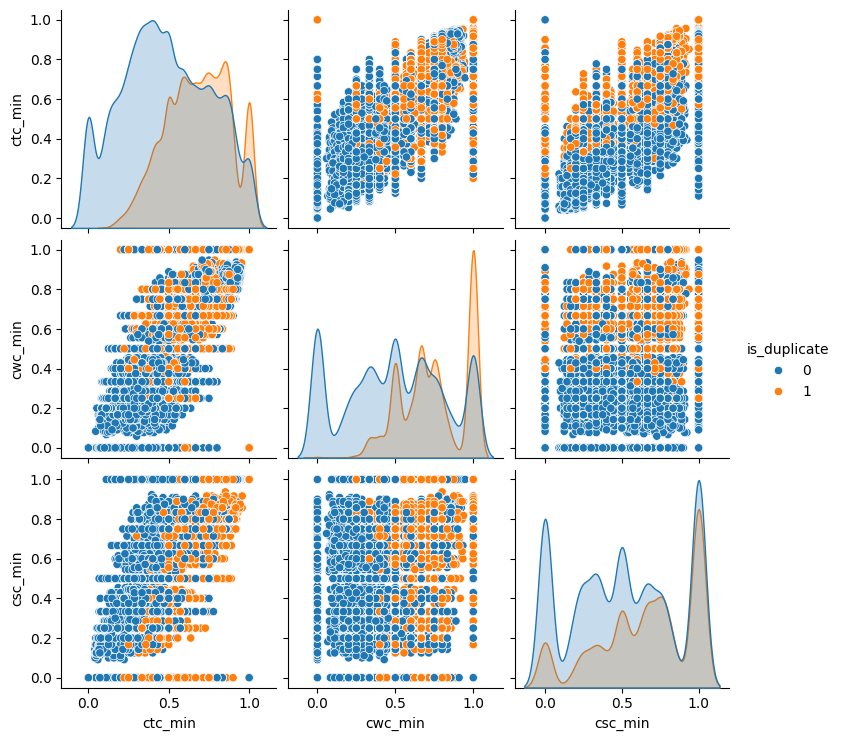

In [40]:
sns.pairplot(df_new[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


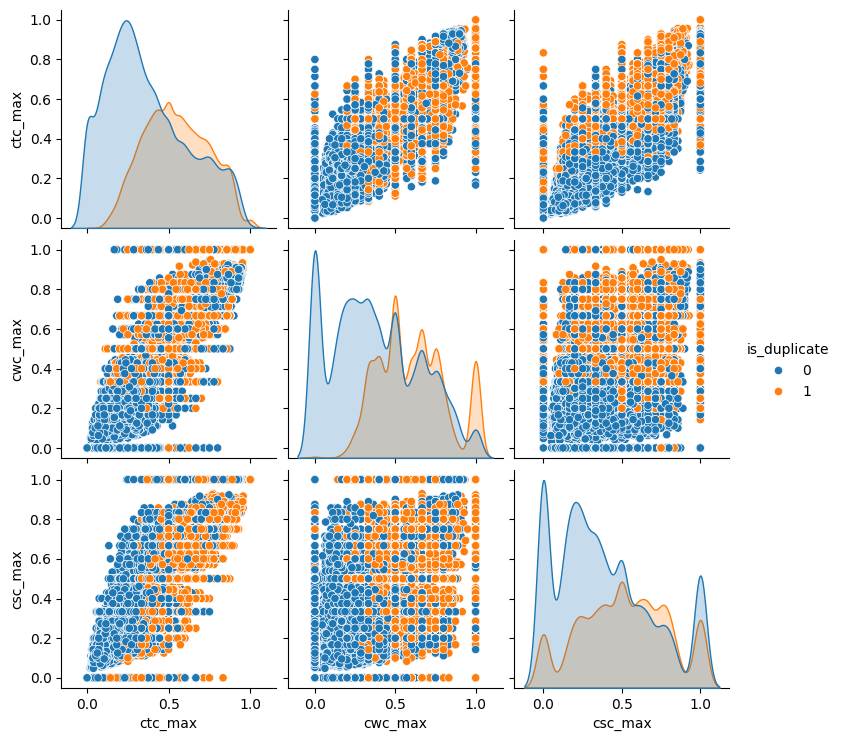

In [41]:
sns.pairplot(df_new[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


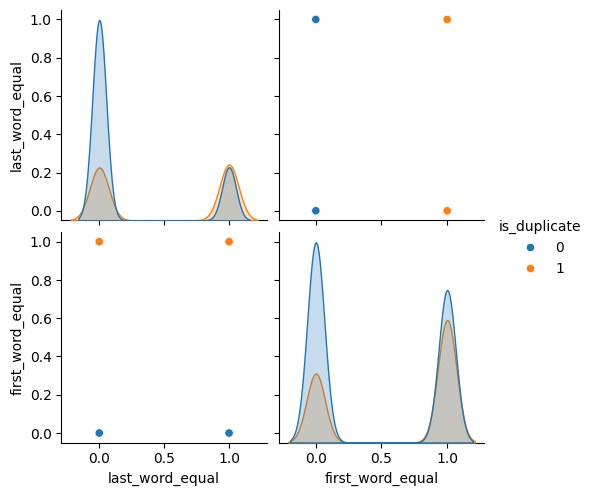

In [43]:
sns.pairplot(df_new[['last_word_equal', 'first_word_equal', 'is_duplicate']],hue='is_duplicate')


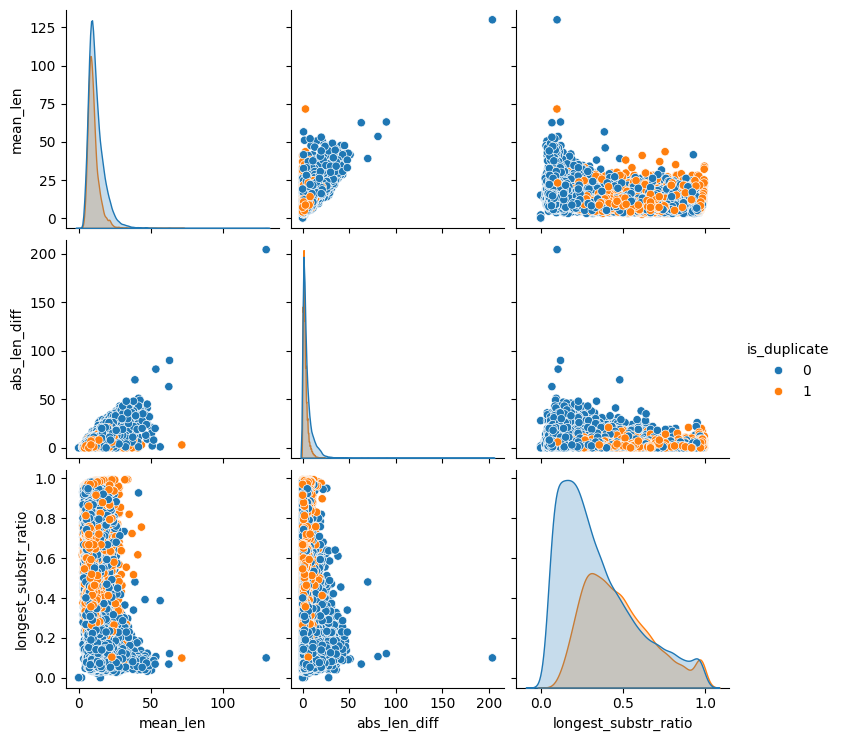

In [44]:
sns.pairplot(df_new[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


We can see that mean_len and abs_len_diff aren't giving us much information about our target feature is_diplicate.

**t-SNE for dimensionality reduction**

In [46]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df_new[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_equal', 'first_word_equal' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df_new['is_duplicate'].values

In [48]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.173s...
[t-SNE] Computed neighbors for 40000 samples in 15.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

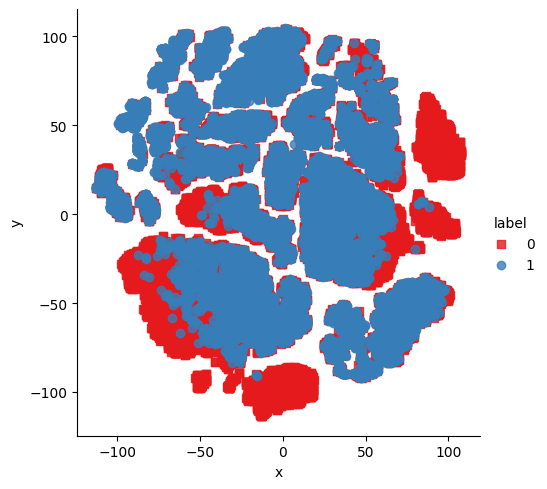

In [51]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [52]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.117s...
[t-SNE] Computed neighbors for 40000 samples in 14.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sa

In [55]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [56]:
ques_df = df_new[['question1','question2']]
ques_df.head()

question1  \
8067                    how do i play pokémon go in korea   
368101  what are some of the best side dishes for crab...   
70497   which is more advisable and better material fo...   
226567        how do i improve logical programming skills   
73186               how close we are to see 3rd world war   

                                                question2  
8067                    how do i play pokémon go in china  
368101  what are some good side dishes for buffalo chi...  
70497        what is the best server setup for buddypress  
226567  how can i improve my logical skills for progra...  
73186                        how close is a world war iii

In [57]:
final_df = df_new.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
8067               0      33      33             8             8            7   
368101             0      52      50            11             9            6   
70497              0      95      44            17             8            2   
226567             1      43      51             7             9            6   
73186              1      37      28             9             7            4   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
8067            16        0.44  0.749981  0.749981  ...  0.874989   
368101          20        0.30  0.399992  0.399992  ...  0.545450   
70497           25        0.08  0.000000  0.000000  ...  0.124999   
226567          16        0.38  0.999975  0.999975  ...  0.666659   
73186           16        0.25  0.749981  0.599988  ...  0.444440   

        last_word_equal  first_word_equal  abs_len_diff  mean_len  \
8067                0.0               1.0           0.0       8.0   
368101              0.0               1.0           2.0      10.0   
70497               0.0               0.0           8.0      12.0   
226567              0.0               1.0           2.0       8.0   
73186               0.0               1.0           2.0       8.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
8067                0.823529          88                  88   
368101              0.333333          73                  72   
70497               0.111111          35                  43   
226567              0.272727          72                  67   
73186               0.344828          68                  61   

        token_sort_ratio  token_set_ratio  
8067                  81               90  
368101                73               73  
70497                 36               24  
226567                89               96  
73186                 71               81  

[5 rows x 23 columns]

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [59]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(40000, 6000)

In [60]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
8067               0      33      33             8             8            7   
368101             0      52      50            11             9            6   
70497              0      95      44            17             8            2   
226567             1      43      51             7             9            6   
73186              1      37      28             9             7            4   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
8067            16        0.44  0.749981  0.749981  ...     0     0     0   
368101          20        0.30  0.399992  0.399992  ...     0     0     0   
70497           25        0.08  0.000000  0.000000  ...     0     0     0   
226567          16        0.38  0.999975  0.999975  ...     0     0     0   
73186           16        0.25  0.749981  0.599988  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
8067       0     0     0     0     0     0     0  
368101     0     0     0     0     0     0     0  
70497      0     0     0     0     0     0     0  
226567     0     0     0     0     0     0     0  
73186      0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.785

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.791

In [74]:
!pip install lightgbm

In [75]:
from lightgbm import LGBMClassifier

In [79]:
lgb_model = LGBMClassifier(random_state = 42)
lgb_model.fit(X_train,y_train)


[LightGBM] [Info] Number of positive: 11768, number of negative: 20232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.915819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11724
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 3460
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367750 -> initscore=-0.541882
[LightGBM] [Info] Start training from score -0.541882


LGBMClassifier(random_state=42)

In [82]:
y_pred2 = lgb_model.predict(X_test)
accuracy_score = (y_test, y_pred2)

In [64]:
from sklearn.metrics import confusion_matrix


In [65]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[4297,  695],
       [1025, 1983]])

In [67]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[4207,  785],
       [ 887, 2121]])

In [83]:
#for lightboost model
confusion_matrix(y_test, y_pred2)

array([[4211,  781],
       [ 860, 2148]])

In [68]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [69]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [70]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [71]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [72]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [73]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))